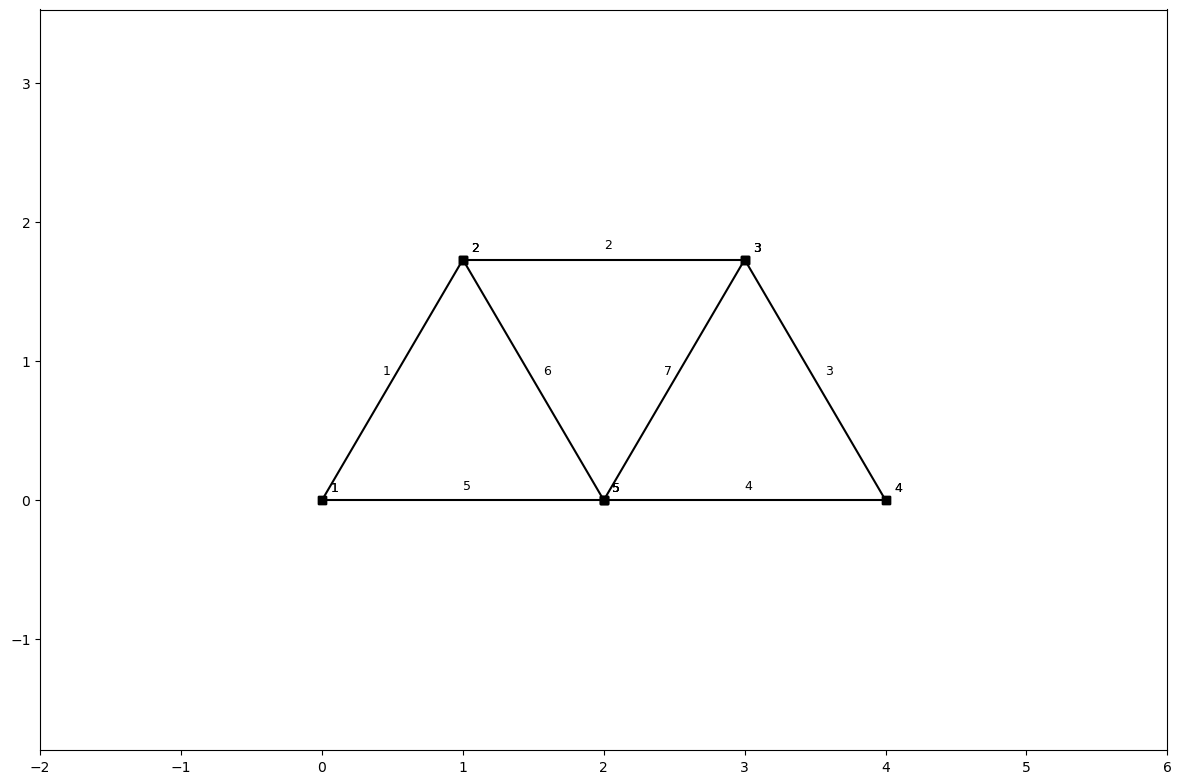

In [1]:
from anastruct import *
from math import *
# create our structural element object(ss)
ss = SystemElements()

θ = radians(60)

# Creating nodes
A,B,C,D,E = [0, 0],[2*cos(θ), 2*sin(θ)],[2+2*cos(θ), 2*sin(θ)],[4,0],[2,0]

# Creating Structural Element With Nodal Positions
ss.add_truss_element(location=[A, B])
ss.add_truss_element(location=[B, C])
ss.add_truss_element(location=[C, D])
ss.add_truss_element(location=[D, E])
ss.add_truss_element(location=[E, A])
ss.add_truss_element(location=[B, E])
ss.add_truss_element(location=[E, C])

ss.show_structure()

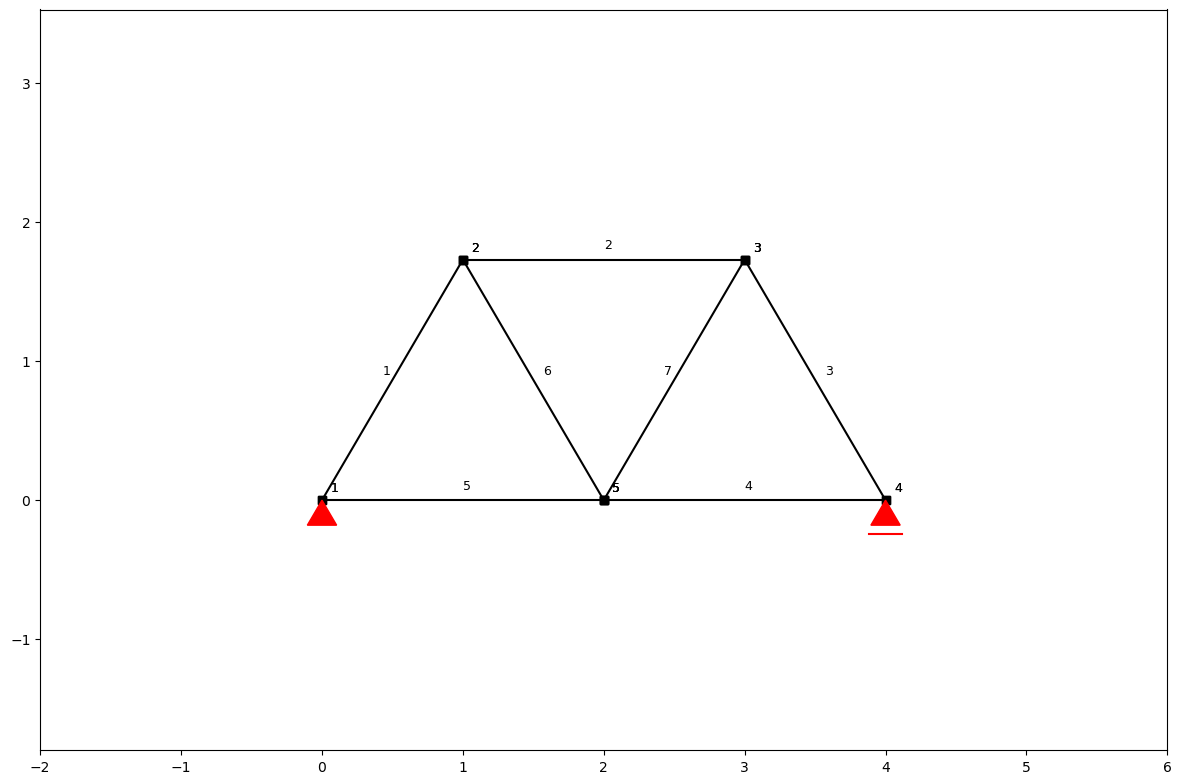

In [2]:
# Define Support Conditions
ss.add_support_hinged(node_id=1)
ss.add_support_roll(node_id=4)
ss.show_structure()

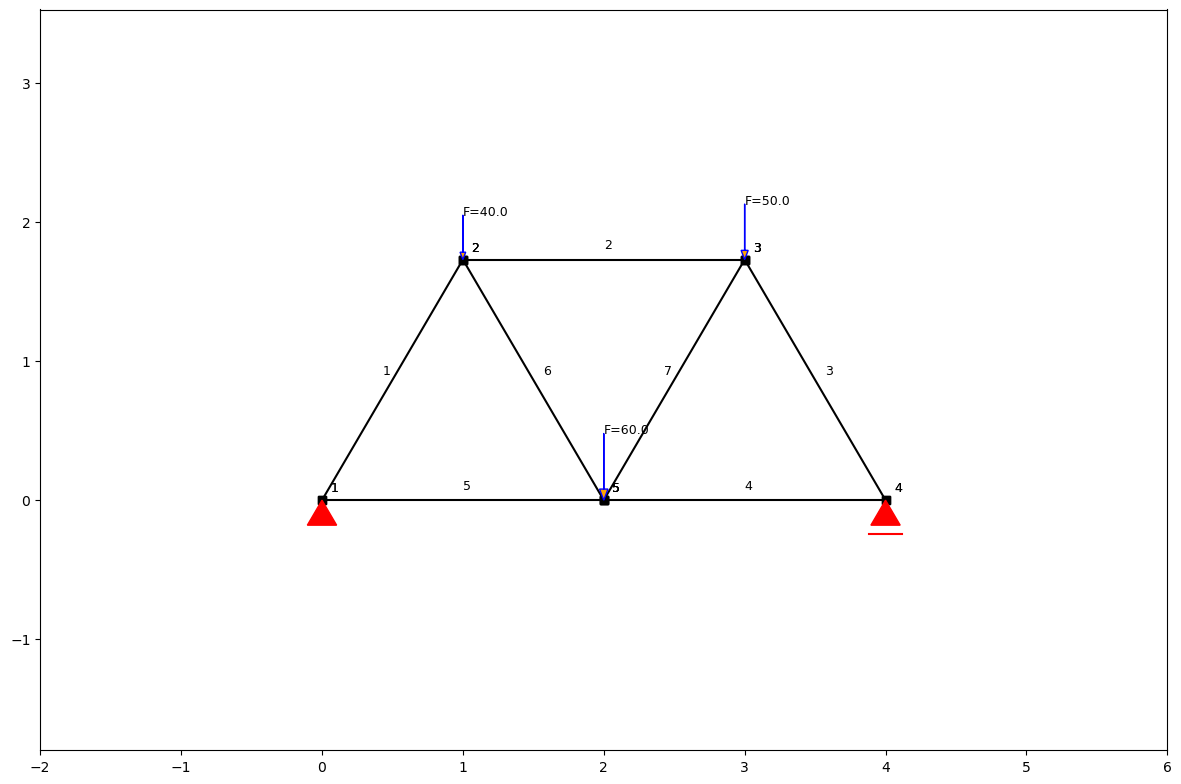

In [3]:
# Add External Forces(load) to the Structure
ss.point_load(node_id=2,Fy=-40)
ss.point_load(node_id=3,Fy=-50)
ss.point_load(node_id=5,Fy=-60)
ss.show_structure()

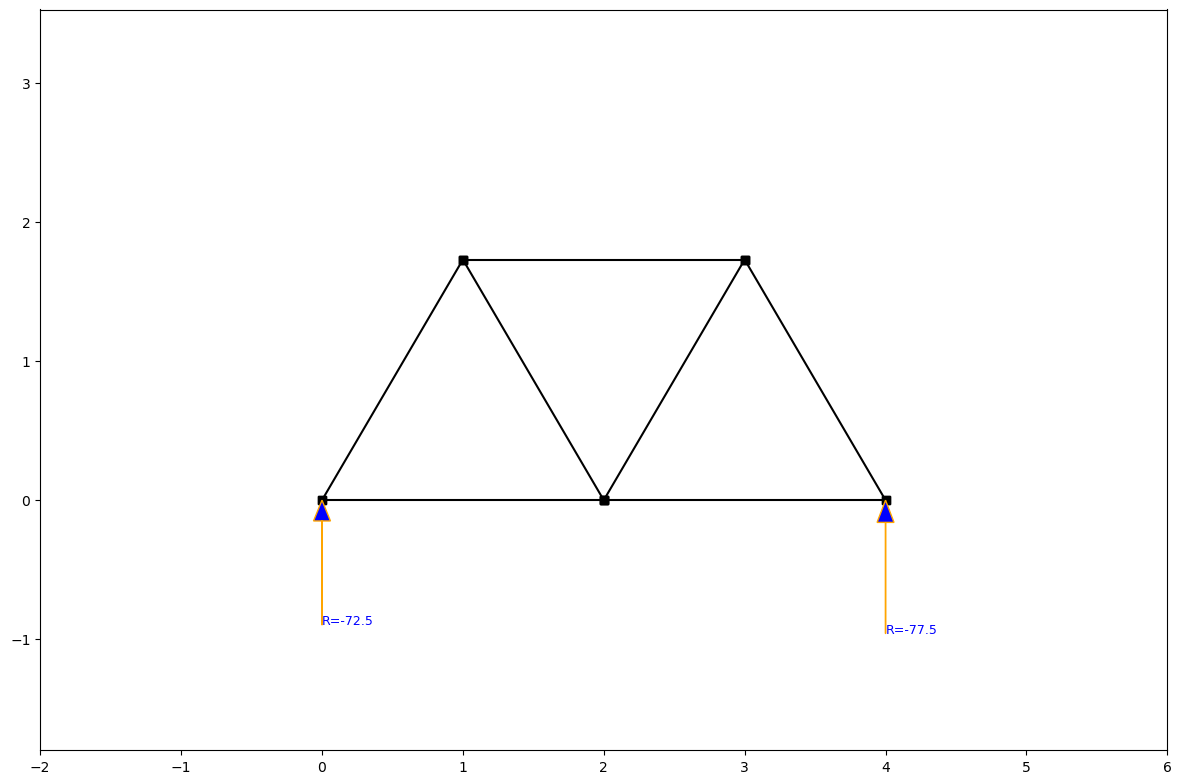

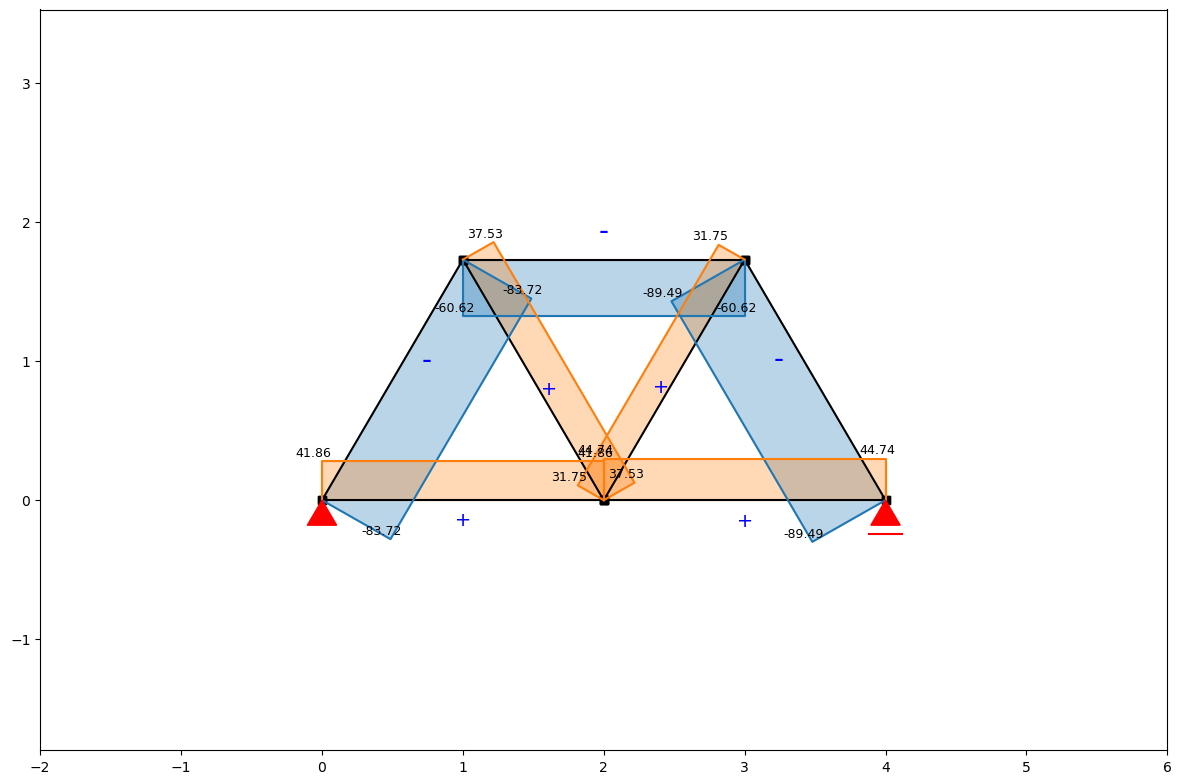

In [4]:
# Solving truss
ss.solve()
# plotting reaction
ss.show_reaction_force()
# plotting axial loads
ss.show_axial_force()

# Exporting data to file
import pandas as pd
df = pd.DataFrame(ss.get_element_results())

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df =df[['id', 'length','Nmax']]
df.to_excel('result-2.xlsx')